In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Personal_projects/Udacity/'

Mounted at /content/gdrive


In [2]:
!pip install pdpbox

In [3]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import random
import pickle

#import shap
from pdpbox import pdp, get_dataset, info_plots

# magic word for producing visualizations in notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load models

best_rf = pickle.load(open(base_dir + 'best_rf.sav', 'rb'))
best_rf_cond = pickle.load(open(base_dir + 'best_rf_cond.sav', 'rb'))
best_gbm = pickle.load(open(base_dir + 'best_gbm.sav', 'rb'))

In [0]:
# Load data

df_train = pd.read_csv(base_dir + "df_train_processed.csv")
df_test = pd.read_csv(base_dir + "df_test_processed.csv")

In [6]:
!pip install pdpbox

In [7]:
!pip install shap

In [0]:
import shap
from pdpbox import pdp, get_dataset, info_plots

In [9]:
!cd '/content/gdrive/My Drive/Personal_projects'
!ls

drive  gdrive  sample_data


In [0]:
# Load data

df_train = pd.read_csv(base_dir + "df_train_processed.csv")
df_test = pd.read_csv(base_dir + "df_test_processed.csv")

In [0]:
# Load models

best_rf = pickle.load(open(base_dir +'best_rf.sav', 'rb'))
best_rf_cond = pickle.load(open(base_dir +'best_rf_cond.sav', 'rb'))
best_gbm = pickle.load(open(base_dir +'best_gbm.sav', 'rb'))

In [0]:
top_features = ['D19_SOZIALES', 'D19_KONSUMTYP_MAX','D19_KONSUMTYP', 'LNR', 
                'EINGEZOGENAM_HH_JAHR', 'ALTERSKATEGORIE_GROB', 'HH_EINKOMMEN_SCORE']

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


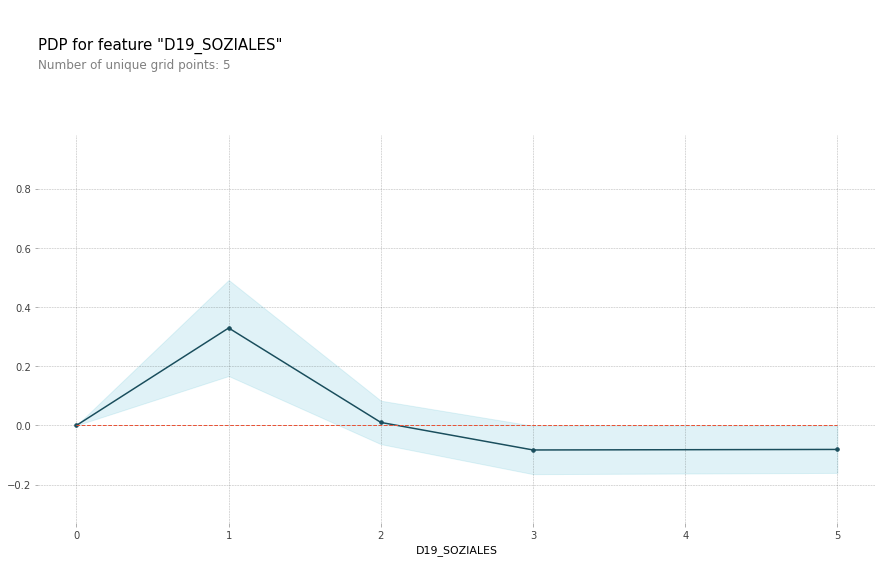

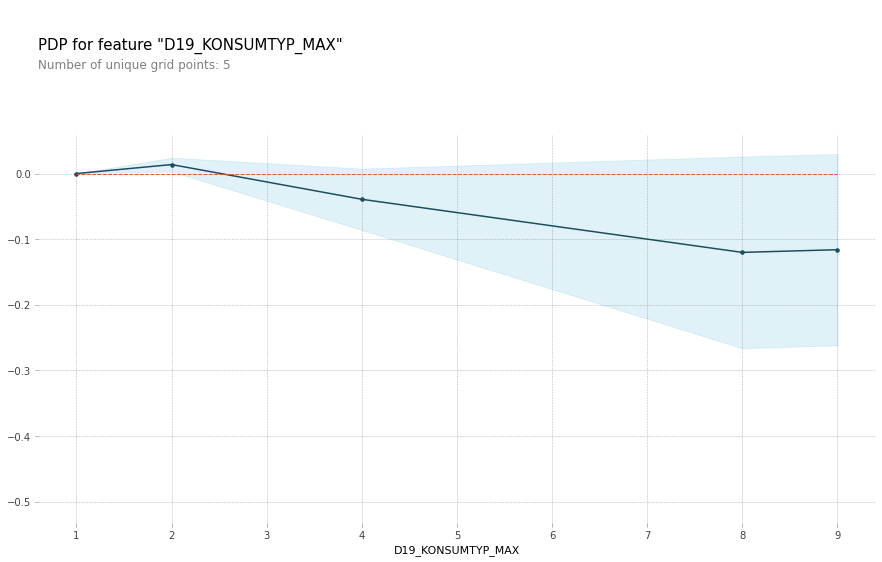

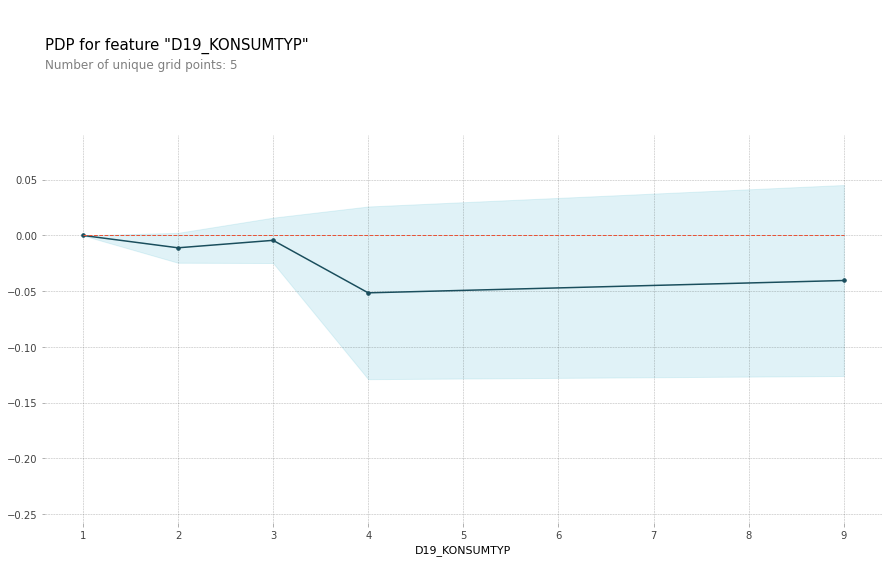

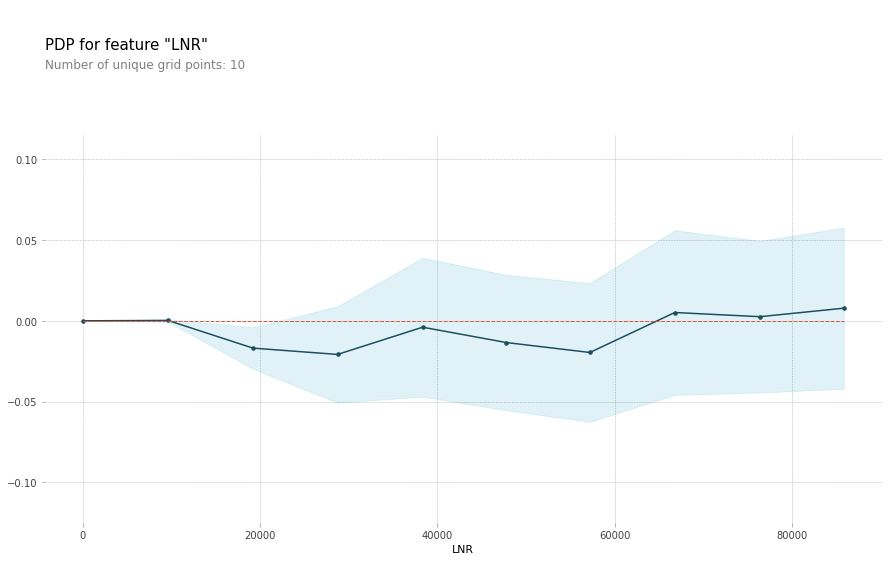

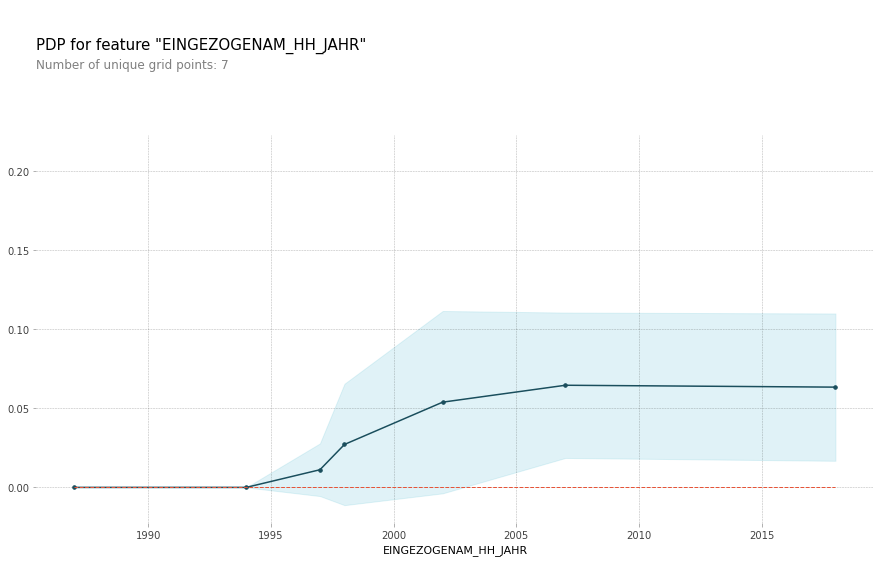

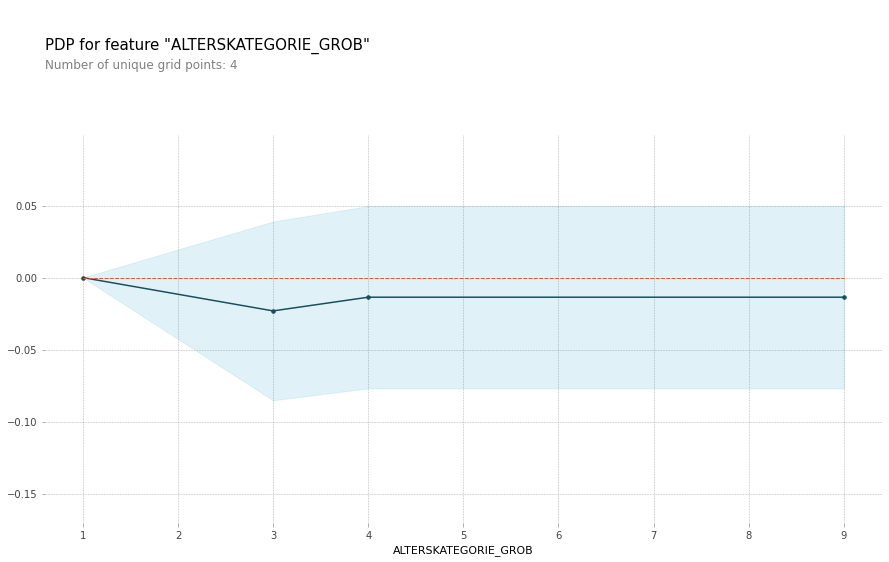

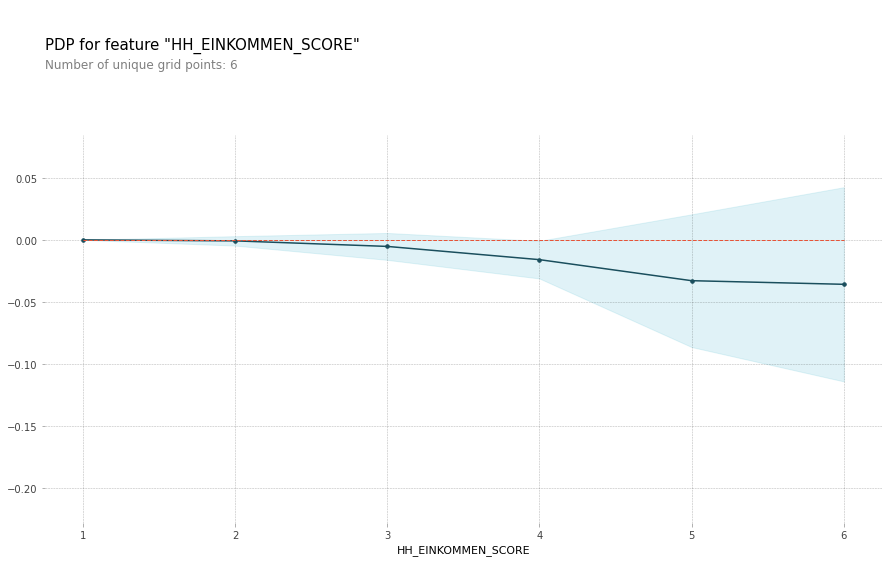

In [13]:
for test_feature in top_features:
  pdp_success = pdp.pdp_isolate(model=best_rf_cond, dataset=df_test, model_features=top_features, feature=test_feature)
  pdp.pdp_plot(pdp_success, test_feature)
  #pdp.info_plots.target_plot(pdp_success, test_feature)
  plt.show()

In [0]:
explainer = shap.TreeExplainer(best_rf_cond)

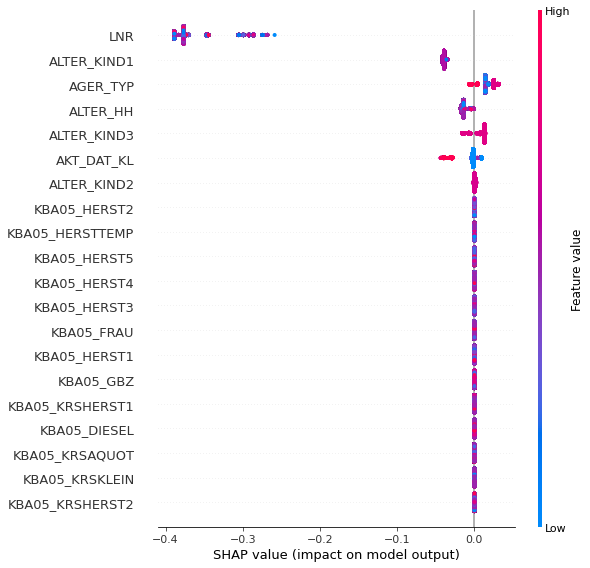

In [15]:
# All factors
#explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(df_test)
shap.summary_plot(shap_values[1], df_test)